In [1]:
import sys
import os
import torch
import torch.nn as nn
import numpy as np

sys.path.append("./")

In [2]:
from autoencode import AEEnsemble
from datasets import UnsupervisedDataset, SupervisedDataset

In [3]:
sup_data = SupervisedDataset("/export/gaon1/data/jteneggi/DL/pedreira")

spikes, targets = sup_data[0]

assert len(spikes) == len(targets)
print(spikes.shape)

(12012, 39)


In [4]:
os.environ["CUDA_VISIBLE_DEVICES"] = "5"
device = "cuda:0" if torch.cuda.is_available() else "cpu"

ae = AEEnsemble(
    optim=torch.optim.Adam,
    convolutional_encoding=False, 
    batch_size=32, 
    epochs=50, 
    lr=(0.001, 0.001, 0.001),
    device=device, 
    activ=nn.ReLU
)

Using cuda:0
Using cuda:0
Using cuda:0
Using cuda:0
Using cuda:0
Using cuda:0


In [5]:
loss_history = ae.fit(sup_data)
ae.save(prefix="simulated")


EPOCH 1 of 50

EPOCH 2 of 50

EPOCH 3 of 50

EPOCH 4 of 50

EPOCH 5 of 50

EPOCH 6 of 50

EPOCH 7 of 50

EPOCH 8 of 50

EPOCH 9 of 50

EPOCH 10 of 50

EPOCH 11 of 50

EPOCH 12 of 50

EPOCH 13 of 50

EPOCH 14 of 50

EPOCH 15 of 50

EPOCH 16 of 50

EPOCH 17 of 50

EPOCH 18 of 50

EPOCH 19 of 50

EPOCH 20 of 50

EPOCH 21 of 50

EPOCH 22 of 50

EPOCH 23 of 50

EPOCH 24 of 50

EPOCH 25 of 50

EPOCH 26 of 50

EPOCH 27 of 50

EPOCH 28 of 50

EPOCH 29 of 50

EPOCH 30 of 50

EPOCH 31 of 50

EPOCH 32 of 50

EPOCH 33 of 50

EPOCH 34 of 50

EPOCH 35 of 50

EPOCH 36 of 50

EPOCH 37 of 50

EPOCH 38 of 50

EPOCH 39 of 50

EPOCH 40 of 50

EPOCH 41 of 50

EPOCH 42 of 50

EPOCH 43 of 50

EPOCH 44 of 50

EPOCH 45 of 50

EPOCH 46 of 50

EPOCH 47 of 50

EPOCH 48 of 50

EPOCH 49 of 50

EPOCH 50 of 50


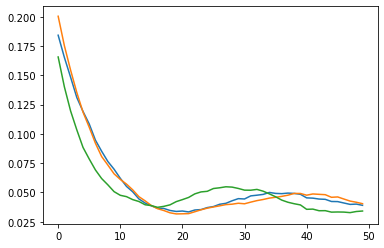

In [6]:
import matplotlib.pyplot as plt
for ae_loss in loss_history:
    plt.plot(ae_loss)

torch.Size([12012, 39])


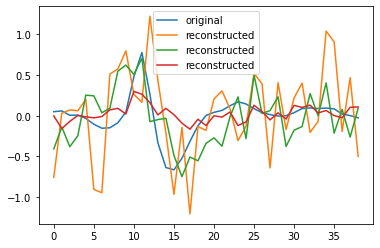

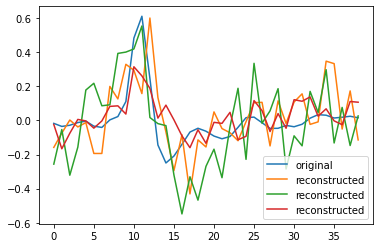

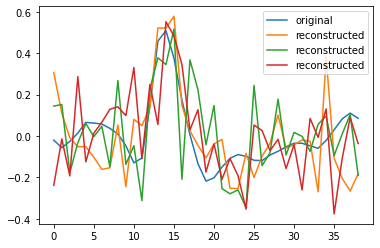

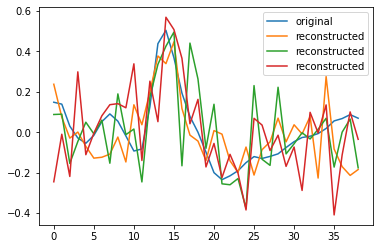

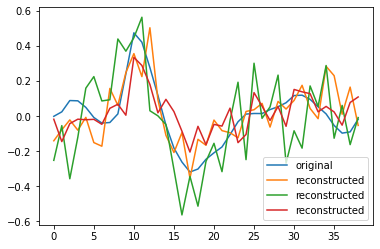

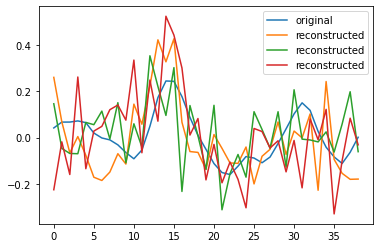

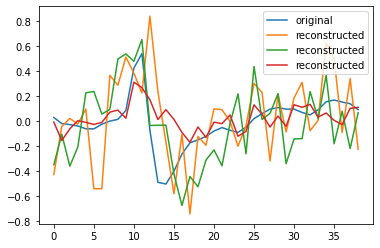

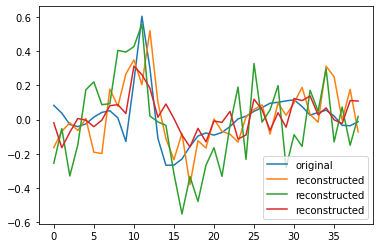

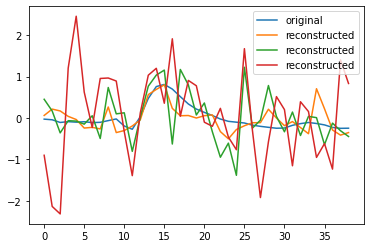

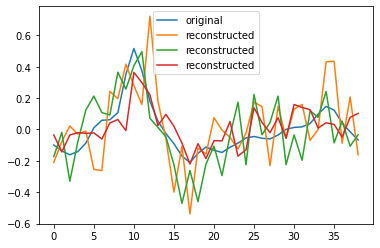

In [8]:
device = torch.device("cuda:0")

spikes, _ = sup_data[0]
spikes = torch.from_numpy(spikes).float().to(device)
print(spikes.size())
for e, d in zip(ae.encoders, ae.decoders):
    e.eval()
    d.eval()
for spike in spikes[:10]:
    spike = spike.unsqueeze(0)
    latent_vecs = [e(spike) for e in ae.encoders]
    reconstructed = [d(latent_vecs[i]) for i, d in enumerate(ae.decoders)]    
    plt.plot(spike.squeeze().detach().cpu(), label="original")
    for r in reconstructed:
        plt.plot(r.squeeze().detach().cpu(), label="reconstructed")
    plt.legend()
    plt.show()